In [26]:
import numpy as np
from matplotlib import pyplot as plt
import json
import matplotlib
%matplotlib inline

with open(('./spot_videos/controller_log.json')) as f:
    data = json.load(f)
    
dp = len(data["1"]['raibert_action_commanded'])
ls = len(data)



In [27]:
print(np.array(data[str(1)]['raibert_base_velocity']).shape)
num_pts = len(data.keys())
vels = np.zeros((num_pts*100, 3))
ang_vels = np.copy(vels)
target_vel = np.copy(vels)
ang_vels_fin = np.copy(vels)
vels_fin = np.copy(vels)
ori = np.copy(vels)

for i in range(num_pts):
    vels[i*100:(i+1)*100,:] = np.array(data[str(i+1)]['raibert_base_velocity'])
    cur_target_vel = np.array(data[str(i+1)]['target_speed'])
    target_vel[i*100:(i+1)*100,0:2] = np.array(data[str(i+1)]['target_speed'])
    ang_vels[i*100:(i+1)*100,:]  = np.array(data[str(i+1)]['raibert_base_velocity'])
    vels_fin[i*100:(i+1)*100,0:3] = np.array(data[str(i+1)]['raibert_base_velocity_finite'])
    ori[i*100:(i+1)*100,0:3] = np.array(data[str(i+1)]['raibert_base_ori_euler'])


(100, 3)


Text(0.5, 1.0, 'Y-Velocity')

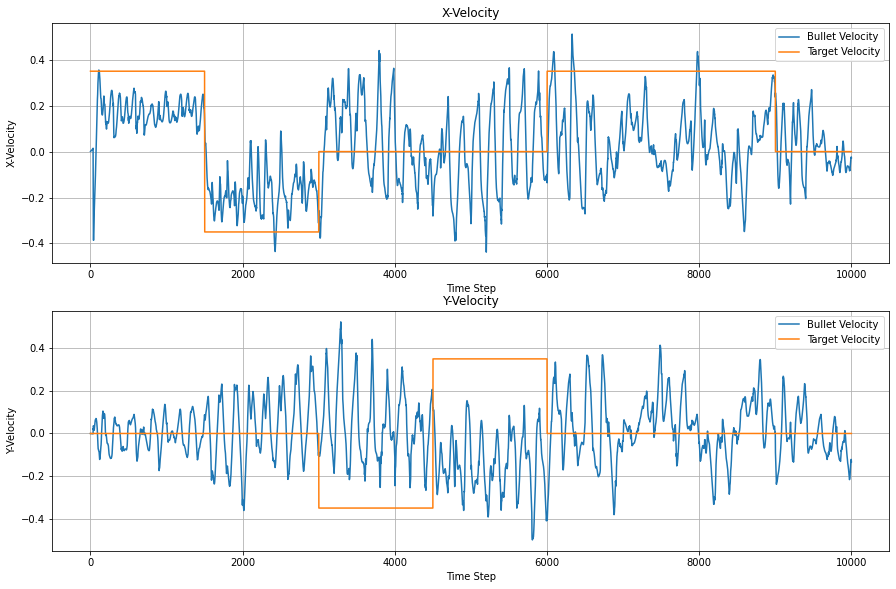

In [28]:
matplotlib.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,1,1)
idx = np.arange(0,10000)
plt.plot(vels[idx, 0])
plt.plot(target_vel[idx,  0])
plt.legend(['Bullet Velocity', 'Target Velocity'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('X-Velocity')
plt.title('X-Velocity')
plt.subplot(3,1,2)

plt.plot(vels[idx, 1])
plt.plot(target_vel[idx,  1])
plt.legend(['Bullet Velocity', 'Target Velocity'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Y-Velocity')
plt.title('Y-Velocity')




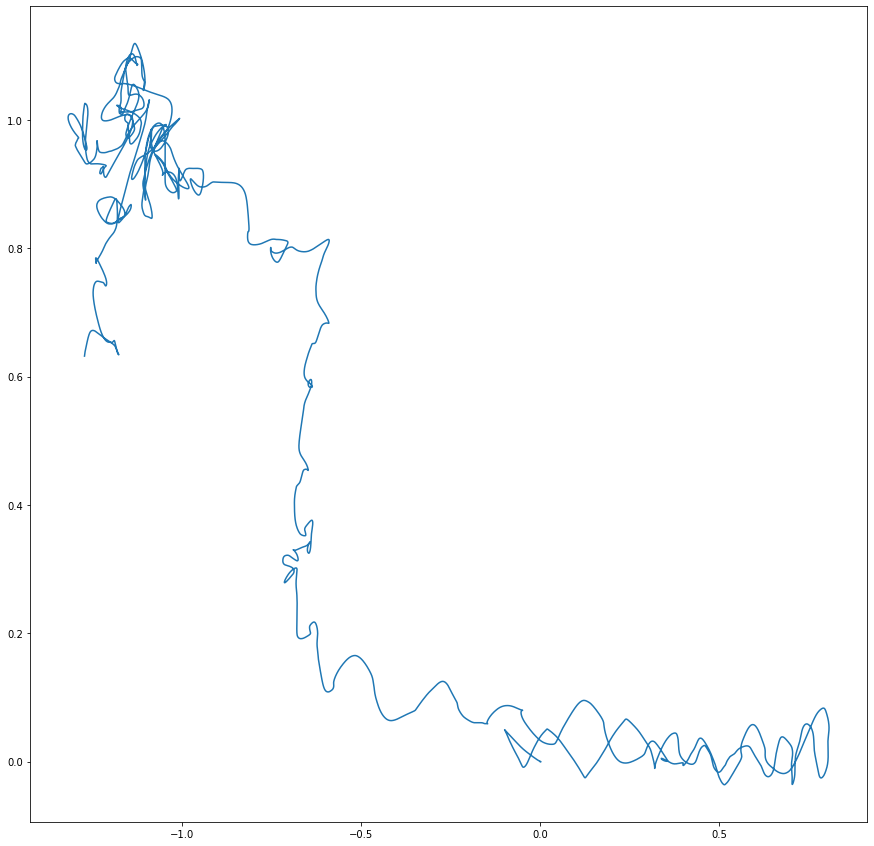

In [22]:
plt.plot(np.cumsum(vels[idx, 0]/120),np.cumsum(vels[idx, 1]/120) )